<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 1
### Academic year: 2023-24

## Conduct a security investigation on web traffic from an organisation
---

For this task, the company UWEtech have enlisted your support as a security data analyst. They believe that they have suffered an attack on their network, however they are unable to diagnose what has happened exactly. The company have provided you with an extract of their network traffic, for which you will use visualisation techniques to learn more about the underlying activity on their systems.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 25% towards your overall portfolio submission**

It is strongly encouraged that you use the online reference guides for [Matplotlib](https://matplotlib.org/) and [pandas](https://pandas.pydata.org/) - searching the API documentation will answer many of your questions.


### Submission Documents
---

For Part 1 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART1.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for all portfolio submissions is **THURSDAY 11th JANUARY @ 14:00**. 

In [1]:
### Load in the libraries and the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

def load_csv_data():
    data = pd.read_csv('./part1/packet-capture3.csv')
    return data

data = load_csv_data()
data = data[ data['Source'].isin(data['Source'].value_counts().head(30).index) ] 
data = data.drop('No.', axis=1)
data

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0
...,...,...,...,...,...,...
9380,833.452154,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID..."
9382,833.458302,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:"
9384,833.557382,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra..."
9386,833.558091,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA..."


---


### Question 1: Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling. 

#### (4 marks)

*Hint: The time is given in seconds with millisecond precision - think how you could aggregate this value to represent seconds only, then research a function that counts the value totals in your data.*

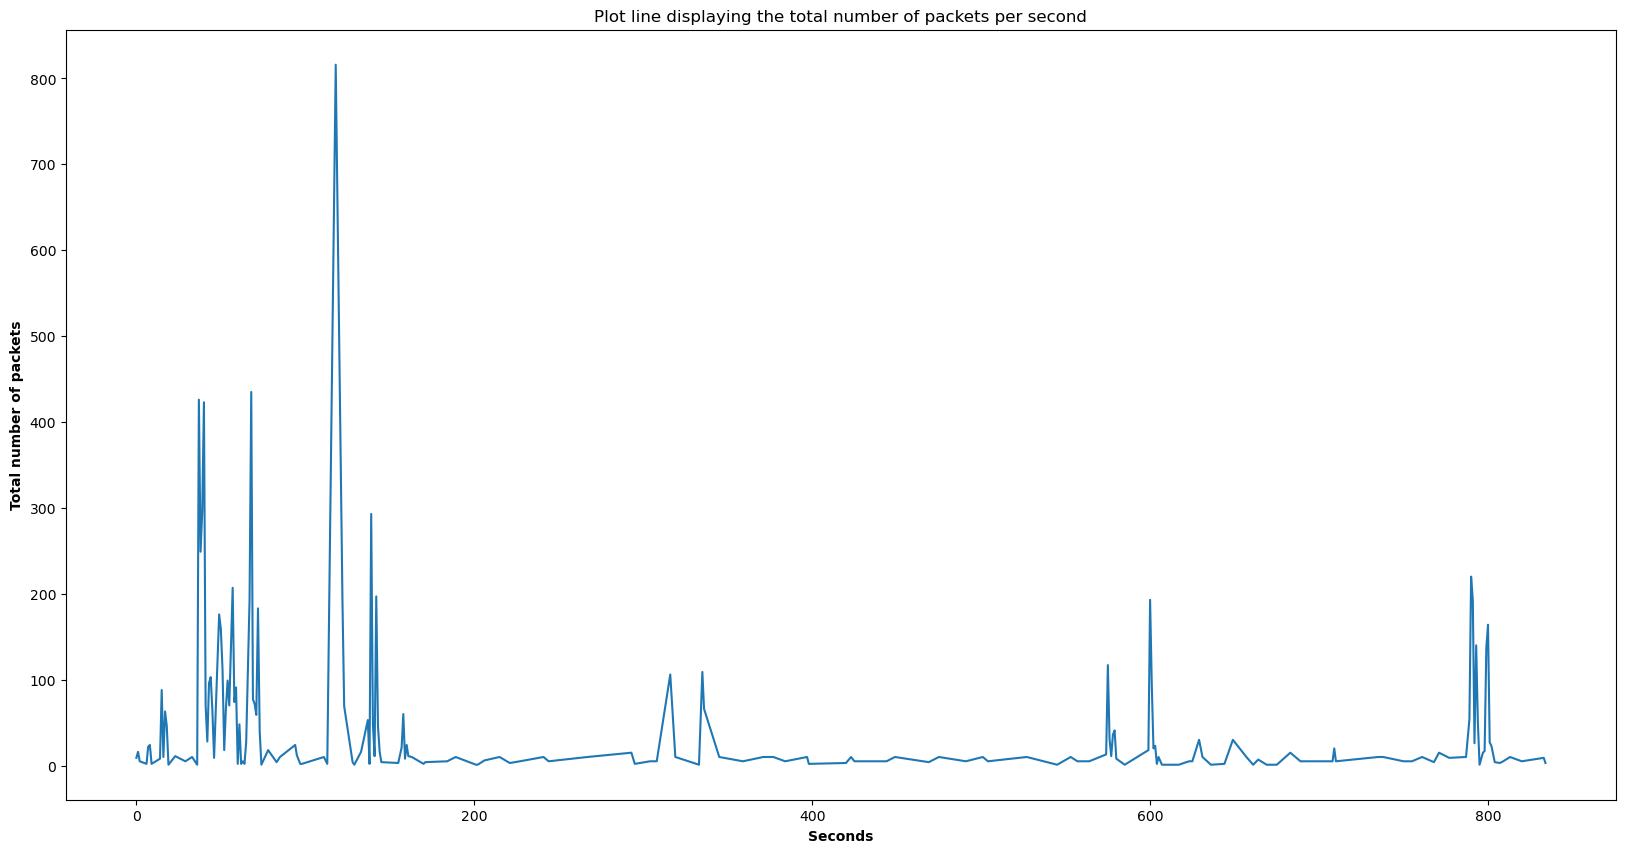

In [2]:
# ANSWER
plt.figure(figsize=(20,10))
# The first step is to convert the time to remove the millisecond precision 
# For that I chose to round the values using pandas round() method then converted the Time data type  from float to int 
data['Time'].describe()
data['Time']=data['Time'].round()
data['Time'] =data['Time'].astype('int64') 
# Using the value_counts function to get the total number of packets per second in our dataset 

#Ordering the Packets_Num in order they appear in the Dataframe 
Packets_Num= data.Time.value_counts()[data.Time.unique()]
#As it was required to generate a plot line chart the kind of the plot function was set as line 
Packets_Num.plot(kind='line')
plt.title('Plot line displaying the total number of packets per second')
plt.xlabel('Seconds', fontweight='bold')
plt.ylabel('Total number of packets', fontweight='bold')


plt.show()

### Question 2: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling. 
#### (2 marks)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

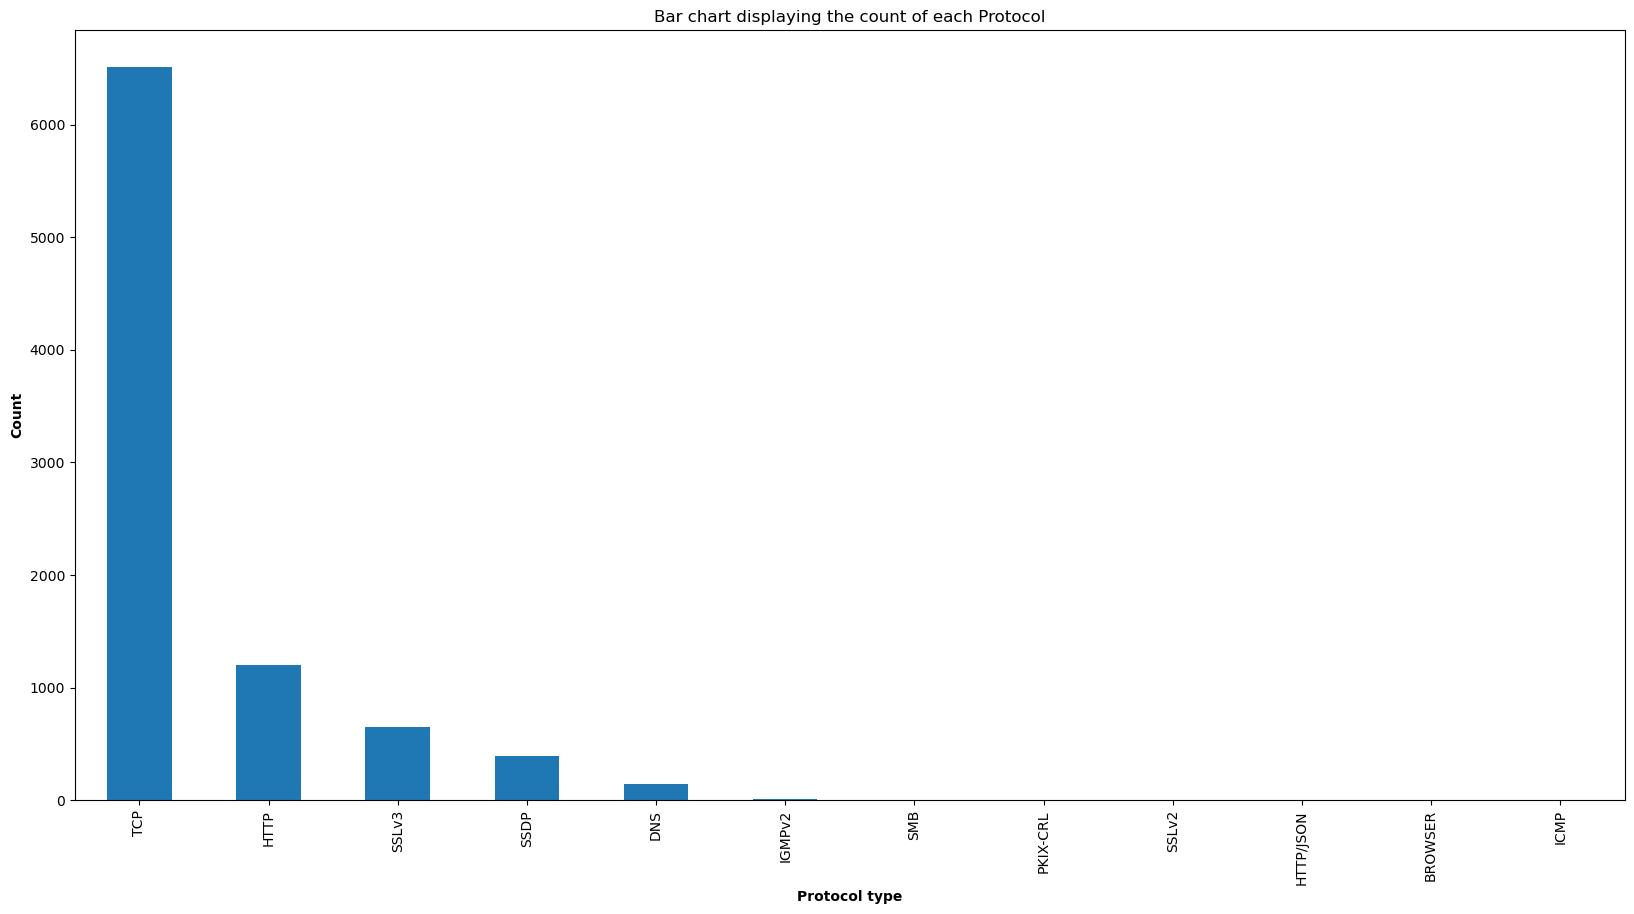

In [44]:
# ANSWER
plt.figure(figsize=(20,10))
# Just as before the value_counts function was used to get the total number of each Protocol in the dataset  
Protocol_count=pd.value_counts(data['Protocol'])
# Once the count calculated the matplotlib method was used to create the bar chart 
Protocol_count.plot(kind='bar',title='Bar chart displaying the count of each Protocol')
plt.xlabel('Protocol type', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()


### Question 3: Display a Scatter Chart that shows the association between Source and Destination data. 

#### (2 marks)
*Hint: Matplotlib has a scatterplot function that takes x and y as inputs*

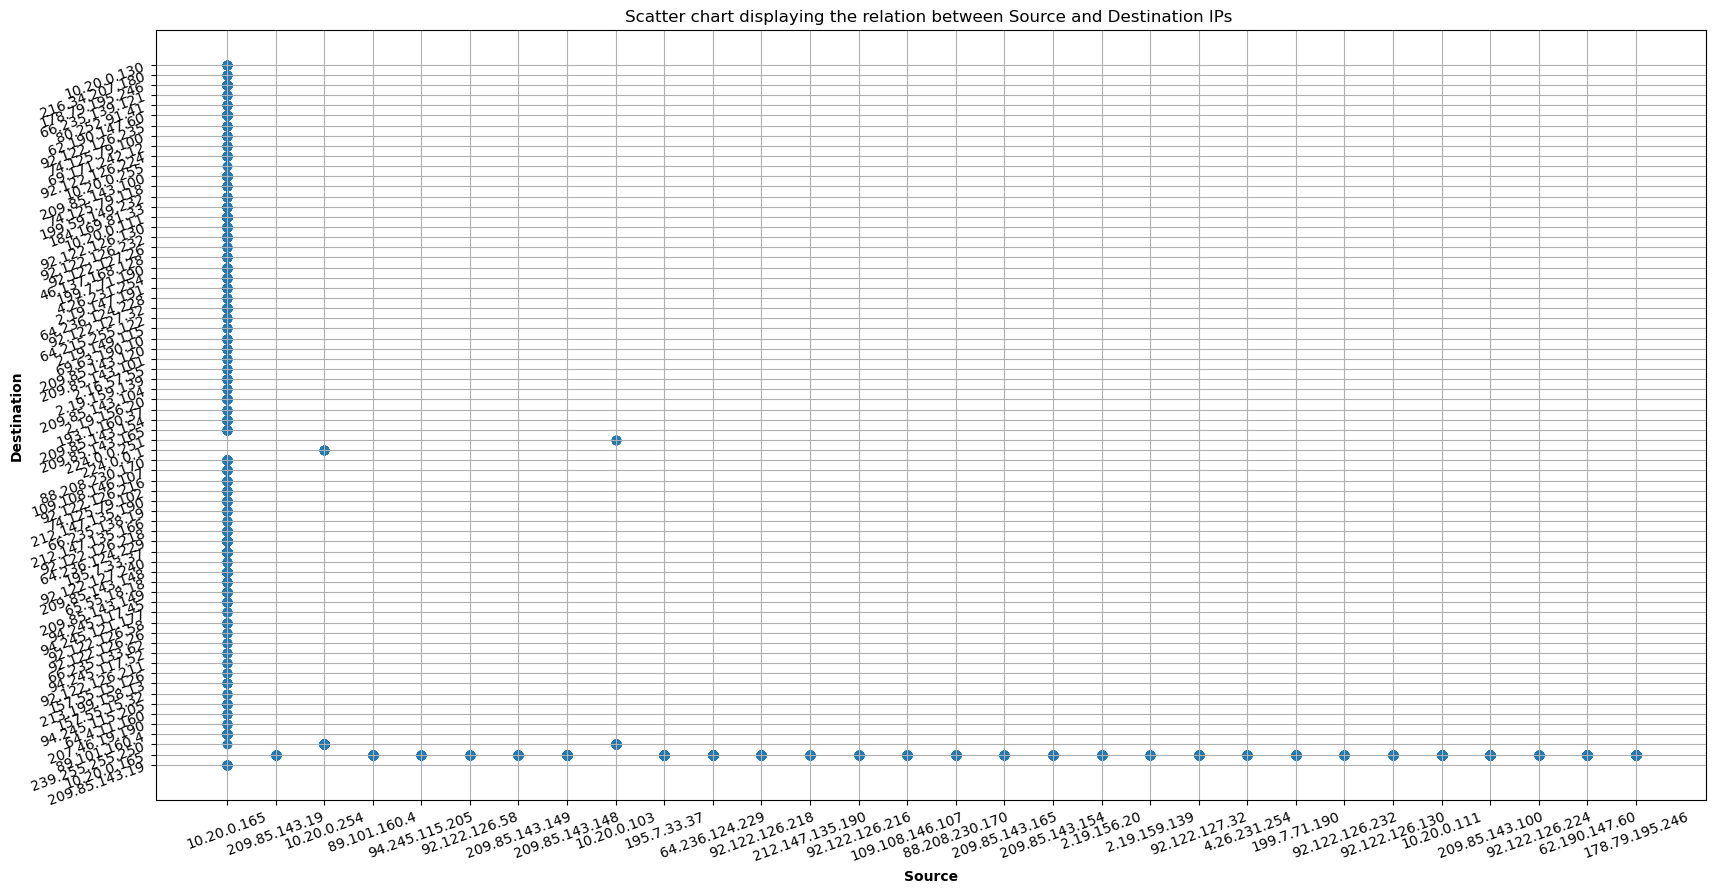

In [3]:
# ANSWER
plt.figure(figsize=(20,10))
plt.xticks(rotation=20)
plt.yticks(rotation=20)
# Using the  matplotlib scatter function I was able to create a scatter chart which has Destination as Y and Source as X 
plt.scatter(data['Source'],data['Destination'])
plt.title('Scatter chart displaying the relation between Source and Destination IPs ')
plt.xlabel('Source', fontweight='bold')
plt.ylabel('Destination', fontweight='bold')
plt.grid()
plt.show()

### Question 4: Display the data as a node link diagram using Source and Destination as your edges. 

#### (3 marks)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

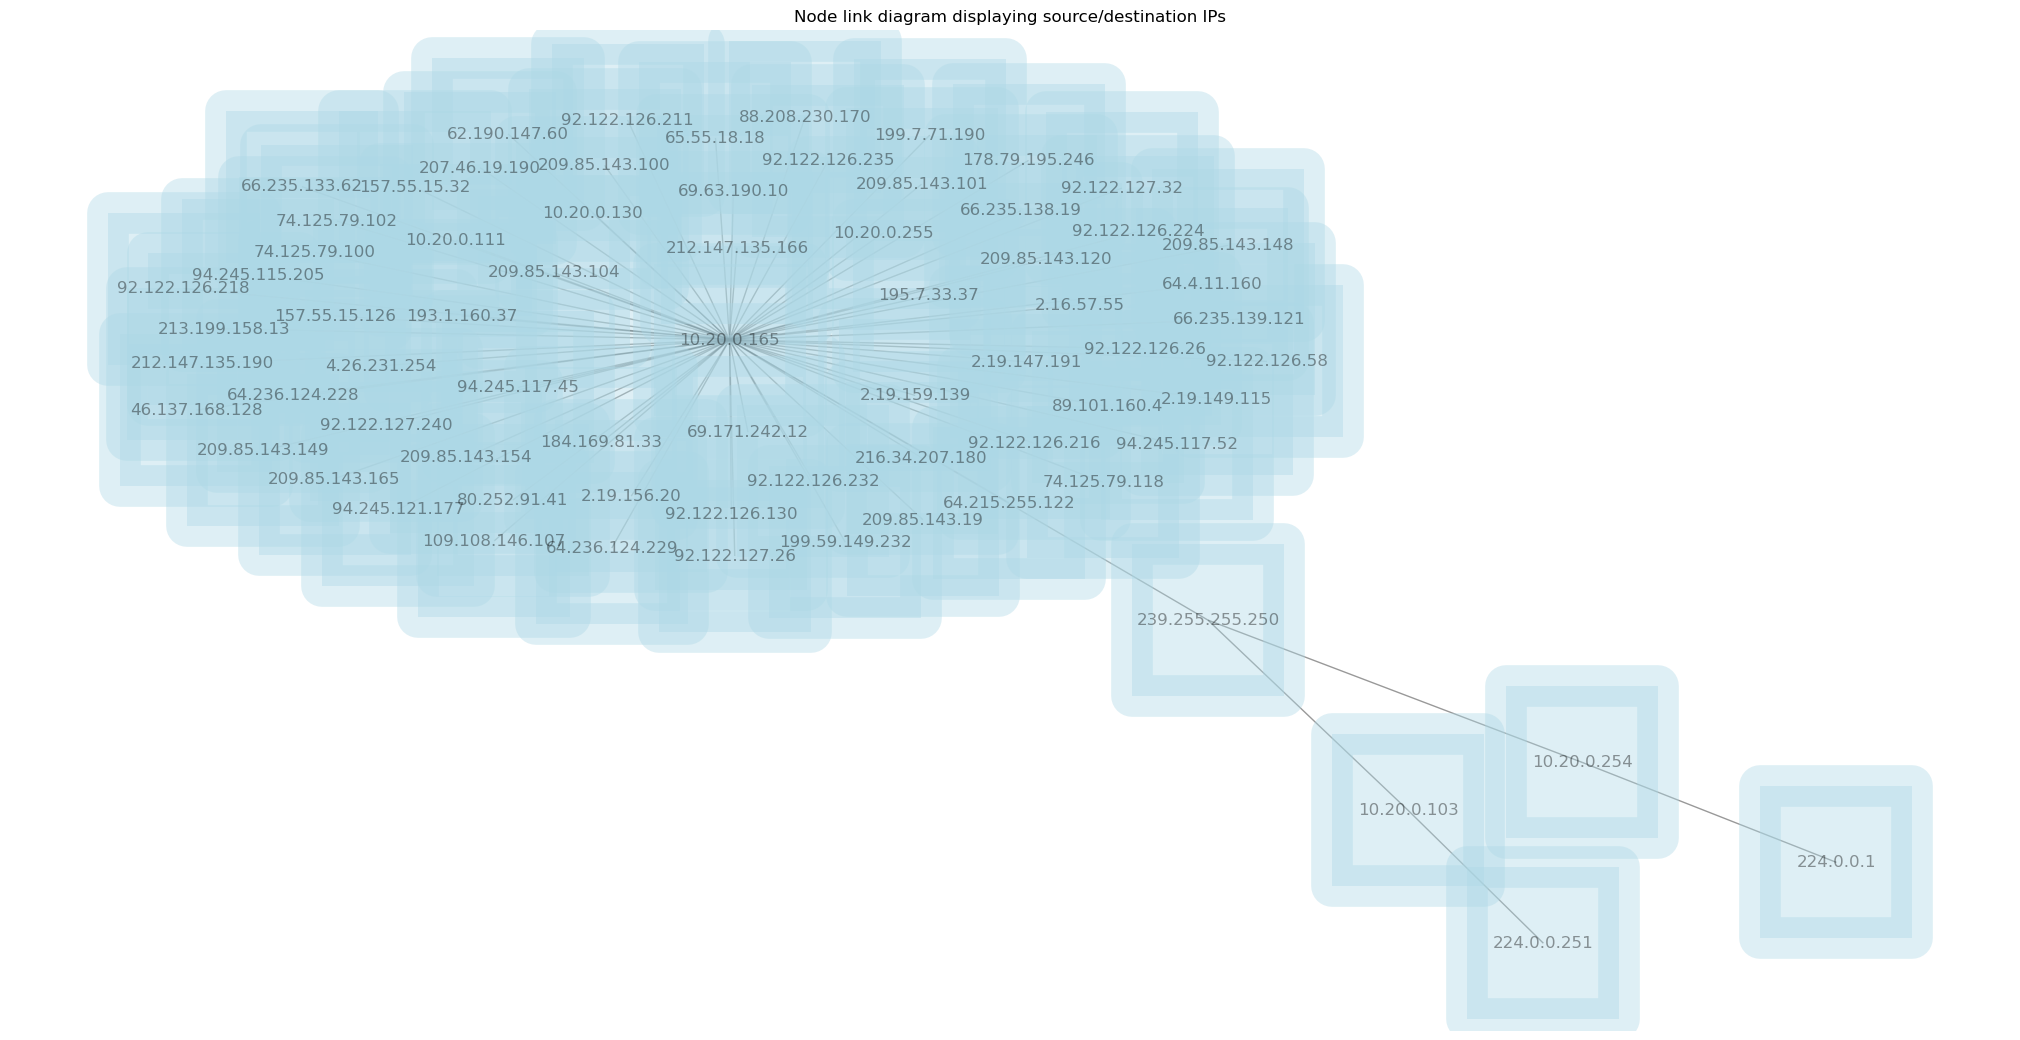

In [42]:
# ANSWER
plt.figure(figsize=(20,10))

G = nx.from_pandas_edgelist(data, source='Source', target='Destination', edge_attr=None)
pos = nx.spring_layout(G)
# some tweaking is needed to visualize the data 
# Drawing the nodes and edges after tweaking the node size and linewidths to get a better graph 
nx.draw(G,with_labels=True,node_size=12000,node_color="lightblue",node_shape='s',alpha=0.4,linewidths=30)
plt.title('Node link diagram displaying source/destination IPs')

plt.show()

### Question 5: For each Protocol type, create a new Column and assign whether the Protocol usage is True or False 

#### (2 marks)
Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.

In [40]:
# Ran this command to get the unique values of Protocols available in the dataset 
#data.Protocol.unique()

# Used the get_dummies pandas function to create columns for each unique protocol type in the Protocol column  
# For each row the type of the protocol will be compared to the name of the newly created columns 
# if protocol type == column name --> 1
# else 0
new_columns = pd.get_dummies(data['Protocol'])

# Used the concat() pandas function to concatenating the old dataframe with the newly created columns  
new_data = pd.concat([data, new_columns], axis=1)
# Replacing the 0's with False and 1's with True to get the New_data dataframe
New_data=new_data.copy()
New_data.replace({0: 'False', 1: 'True'}, inplace=True)
New_data

,Time,Source,Destination,Protocol,Length,Info,BROWSER,DNS,HTTP,HTTP/JSON,ICMP,IGMPv2,PKIX-CRL,SMB,SSDP,SSLv2,SSLv3,TCP
0,False,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...,False,False,False,False,False,False,False,False,False,False,False,True
1,False,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",False,False,False,False,False,False,False,False,False,False,False,True
2,False,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0,False,False,False,False,False,False,False,False,False,False,False,True
3,False,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello,False,False,False,False,False,False,False,False,False,False,True,False
4,False,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,833,10.20.0.165,10.20.0.130,SMB,180,"Tree Connect AndX Request, Path: \\\\WIN-JIDID...",False,False,False,False,False,False,False,True,False,False,False,False
9382,833,10.20.0.165,10.20.0.130,SMB,130,"Trans2 Request, GET_DFS_REFERRAL, File:",False,False,False,False,False,False,False,True,False,False,False,False
9384,834,10.20.0.165,10.20.0.130,SMB,156,"Trans2 Request, GET_DFS_REFERRAL, File: \\bhra...",False,False,False,False,False,False,False,True,False,False,False,False
9386,834,10.20.0.165,10.20.0.130,SMB,148,"Trans2 Request, GET_DFS_REFERRAL, File: \\BHRA...",False,False,False,False,False,False,False,True,False,False,False,False


### Question 6: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol. 

#### (6 marks)
*Hint: Think about how you did this in Question 1 , and recall that plt.plot can be used to append to an existing plot.*

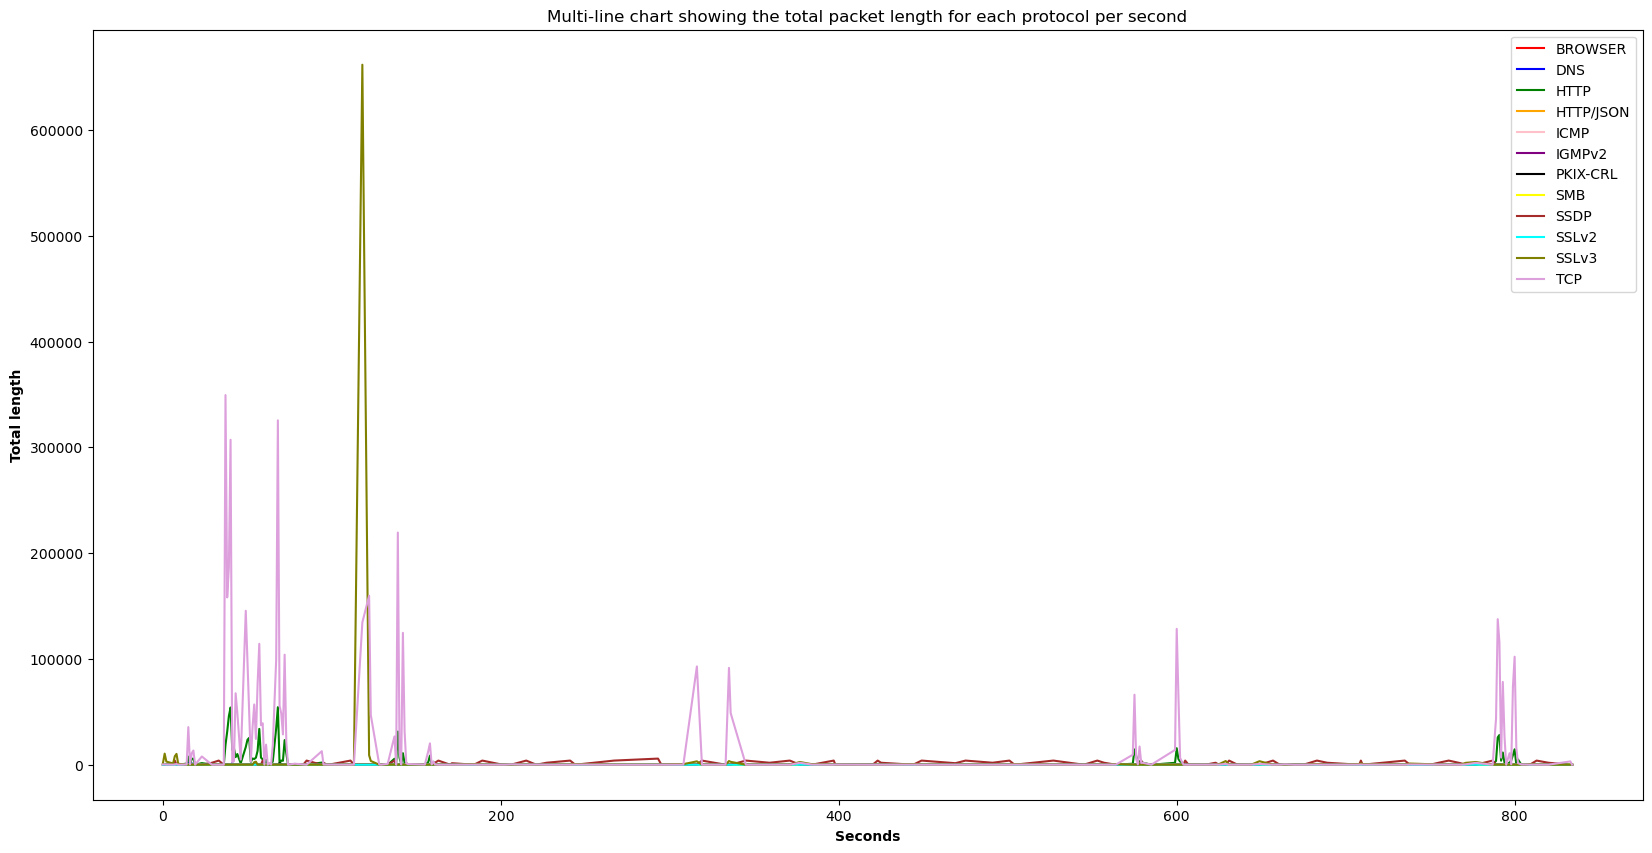

In [41]:
# ANSWER
plt.figure(figsize=(20,10))
sum_by_category_x_axis = new_data.groupby(['Protocol', 'Time'])['Length'].sum()

# Reset the index to convert the result into a DataFrame
sum_by_category_x_axis = sum_by_category_x_axis.reset_index()

# Pivot the DataFrame to have Protocol as columns and Seconds as index
pivot_df = sum_by_category_x_axis.pivot(index='Time', columns='Protocol', values='Length')
#replacing the null values with 0 to have a continuous chart 
pivot_df.replace(np.NaN, 0, inplace=True)

# creating a colors list for each of the 12 protocols 
colors = ['red', 'blue', 'green', 'orange','pink','purple','black','yellow','brown','cyan','olive','plum']

# Plot the multiline chart with the different colors for each of the pivot_df dataframe columns 
for column, color in zip(pivot_df.columns, colors):
    plt.plot(pivot_df[column], color=color)

plt.legend(pivot_df.columns)
plt.title('Multi-line chart showing the total packet length for each protocol per second')
plt.xlabel('Seconds', fontweight='bold')
plt.ylabel('Total length', fontweight='bold')
plt.show()





### Question 7: Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

#### (6 marks)

**Q1**
 An important activity can be observed between 0 and 200 seconds reaching over 800 packets sent at around second 150 
 
**Q2**
TCP is the most used protocol with over 6000 packet’s count, HTTP SSLV3 and DNS following consecutively with a count ranging between 1200 and 200 packets 
 
**Q3**      	
All of the source IPs excluding the ones with 10 as first byte sent packets to the 10.20.0.165 destination IP
On the other hand 10.20.0.165 sent packets to all other IPs excluding both 224.0.0.1 and 224.0.0.251 as these two only received packets from 10.20.0.254 and 10.20.0.103 respectively.

**Q4**
Confirms the results found in question 3 by highlighting the existing links between nodes. Nevertheless the huge amount of nodes in the graph makes it harder to draw conclusions in contrast to question 3 graph. 

**Q6**
The chart confirms the conclusions drawn from question 1 and 2 the small peaks throughout time represent TCP packets being sent while the highest activity peek represents SSLv3 protocol.

**Conclusion:** 
10.20.0.165 is probably a server, allowing the rest of the IPs to connect to the company network 
All 3 IPs with a 10 as a first byte are part of the same network 
The important SSLv3 activity could be a sign of a potential cyber-attack such as POODLE ones. An employee might targeting the server to intercept data and compromise the company. 

